# Spam or not ?

We are going to try and decipher wether the email is a spam or not. We will be using the following kaggle dataset : https://www.kaggle.com/datasets/venky73/spam-mails-dataset to train our model !

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import random
import tensorflow as tf

## 1) Import and explore Data

### 1.1) Exploration

In [5]:
df = pd.read_csv(r'spam_ham_dataset.csv')
df

,Unnamed: 0,label,text,label_num
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,0
...,...,...,...,...
5166,1518,ham,Subject: put the 10 on the ft\r\nthe transport...,0
5167,404,ham,Subject: 3 / 4 / 2000 and following noms\r\nhp...,0
5168,2933,ham,Subject: calpine daily gas nomination\r\n>\r\n...,0
5169,1409,ham,Subject: industrial worksheets for august 2000...,0


In [6]:
# Number of emails per category 
df.groupby('label_num')['label_num'].count()

label_num
0    3672
1    1499
Name: label_num, dtype: int64

We can see that the dataset contains more 'hams' than 'spams'

In [8]:
# Check for missing values
df.isna().sum()

Unnamed: 0    0
label         0
text          0
label_num     0
dtype: int64

In [9]:
# Check types
df.dtypes

Unnamed: 0     int64
label         object
text          object
label_num      int64
dtype: object

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5171 entries, 0 to 5170
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  5171 non-null   int64 
 1   label       5171 non-null   object
 2   text        5171 non-null   object
 3   label_num   5171 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 161.7+ KB


In [11]:
df.columns

Index(['Unnamed: 0', 'label', 'text', 'label_num'], dtype='object')

### 1.2) Visualize random emails of our dataset

In [13]:
# Look at the different emails with the label associated with it

random_mail = random.sample(list(range(len(df))), 5)

for x in random_mail:
    print(f"Label of the chosen mail : {df['label_num'].iloc[x]}\n ----------------------------------------------------\n")
    print(f"{df['text'].iloc[x]} \n -------------------------------------------------- \n")

Label of the chosen mail : 0
 ----------------------------------------------------

Subject: dear all
if you wish to find out more about the mission in
kosovo , you can find news and photos at
" www . kforonline . com " .
take care , mark
do you yahoo ! ?
get your free @ yahoo . co . uk address at http : / / mail . yahoo . co . uk
or your free @ yahoo . ie address at http : / / mail . yahoo . ie 
 -------------------------------------------------- 

Label of the chosen mail : 0
 ----------------------------------------------------

Subject: i can receive attachments on my hotmail address . i can ' t get on juno . send
me one and see if i get it . send my wild thing . and send me something of
jake . and please let me know if everything is ok with jake . love ya , ma
get your private , free email at http : / / www . hotmail . com 
 -------------------------------------------------- 

Label of the chosen mail : 0
 ----------------------------------------------------

Subject: re : 05 / 01

### 1.3) Prepare the data for training and testing

In [15]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df['text'], df['label_num'], random_state=42, test_size=0.33)

len(X_train), len(X_test), len(y_train), len(y_test)

(3464, 1707, 3464, 1707)

In [16]:
# Creating a metrics function
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

def model_results(y_true, y_pred):
    """
    Function to show to different metrics.
    """

    # Accuracy score :
    acc = accuracy_score(y_true, y_pred)

    #precision, recall, fscore
    precision, recall, f1_score, _ = precision_recall_fscore_support(y_true, y_pred, average="weighted")

    dic={"accuracy": acc, "precision": precision, "recall": recall, "f1-score": f1_score}

    return dic
    
    

## 2) Creating and training our models

In [18]:
# Plot the validation and training data seperately

def plot_loss_curves(history):
    """
    Returns seperate loss curves for training and validation metrics.
    """

    loss=history.history['loss']
    val_loss = history.history['val_loss']

    accuracy = history.history['accuracy']
    val_accuracy = history.history['val_accuracy']

    epochs = range(len(history.history['loss']))

    # Plot loss
    plt.plot(epochs, loss, label='training_loss')
    plt.plot(epochs, val_loss, label='val_loss')
    plt.title('Loss')
    plt.xlabel('Epochs')
    plt.legend()

      # Plot accuracy
    plt.figure()
    plt.plot(epochs, accuracy, label='training_accuracy')
    plt.plot(epochs, val_accuracy, label='val_accuracy')
    plt.title('Accuracy')
    plt.xlabel('Epochs')
    plt.legend();

### 2.1) Base Model (Naive Bayes)
Let us first start off by creating a base model. The score from this model will serve as a base score and
we'll try to beat this score.

In [20]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline

# Create tokenization and modelling pipeline
model_0 = Pipeline([
                    ("tfidf", TfidfVectorizer()), # convert words to numbers using tfidf
                    ("clf", MultinomialNB()) # model the text
])

# Fit the pipeline to the training data
model_0.fit(X_train, y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('clf', MultinomialNB())])

In [21]:
# Make predictions :
base_model_pred = model_0.predict(X_test)
base_model_pred

array([0, 1, 0, ..., 0, 0, 0], dtype=int64)

In [22]:
# Show results
results_base_model = model_results(y_test, base_model_pred)
model_results(y_test, base_model_pred)

{'accuracy': 0.8746338605741066,
 'precision': 0.8930094453940662,
 'recall': 0.8746338605741066,
 'f1-score': 0.8606444806842072}

### 2.2) Model 1 (Bidirectional LSTM) 

In [24]:
X_train.shape

(3464,)

In [25]:
# Find the avergae length of strings per mail
avg_length = round(df['text'].apply(lambda x: len(x.split())).mean())
avg_length

228

In [26]:
# Initialize a Text vectorizer to adapt on our data
from tensorflow.keras import layers
max_tokens = 20000

vectorize_layer = layers.TextVectorization(max_tokens = max_tokens,
                                          output_mode='int',
                                          output_sequence_length=avg_length)

In [27]:
# Adapt text vecetorization on training dataset
vectorize_layer.adapt(X_train)

In [28]:
# Convert pandas Series to numpy arrays for fitting!
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

In [29]:
# 1. Set the seed
tf.random.set_seed(42)

model_1_embedding = layers.Embedding(input_dim = max_tokens,
                                     output_dim = 128,
                                     name="embedding_1")

# 2. Build the RNN model unsing LSTM 
inputs = layers.Input(shape=(1,), dtype = "string", name='Input_layer')
x = vectorize_layer(inputs)
x = model_1_embedding(x)
x = layers.Bidirectional(layers.LSTM(64))(x)
outputs = layers.Dense(1, activation='sigmoid')(x)

model_1 = tf.keras.Model(inputs, outputs, name='Model_1')


In [30]:
# 3. Compile the model
model_1.compile(loss='binary_crossentropy',
                optimizer = tf.keras.optimizers.Adam(),
                metrics=['accuracy'])


In [31]:
model_1.summary()

Model: "Model_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ Input_layer (InputLayer)             │ (None, 1)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ text_vectorization                   │ (None, 228)                 │               0 │
│ (TextVectorization)                  │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ embedding_1 (Embedding)              │ (None, 228, 128)            │       2,560,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional (Bidirectional)        │ (None, 128)                 │          98,816 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,658,945 (10.14 MB)

 Trainable params: 2,658,945 (10.14 MB)

 Non-trainable params: 0 (0.00 B)

In [32]:
# 4. Fit the model
model_1_history = model_1.fit(X_train,
                              y_train,
                              epochs=5,
                              validation_data=(X_test, y_test))

Epoch 1/5
109/109 ━━━━━━━━━━━━━━━━━━━━ 20s 131ms/step - accuracy: 0.8995 - loss: 0.2527 - val_accuracy: 0.9660 - val_loss: 0.0941
Epoch 2/5
109/109 ━━━━━━━━━━━━━━━━━━━━ 13s 117ms/step - accuracy: 0.9887 - loss: 0.0374 - val_accuracy: 0.9596 - val_loss: 0.1083
Epoch 3/5
109/109 ━━━━━━━━━━━━━━━━━━━━ 13s 119ms/step - accuracy: 0.9971 - loss: 0.0106 - val_accuracy: 0.9848 - val_loss: 0.0504
Epoch 4/5
109/109 ━━━━━━━━━━━━━━━━━━━━ 13s 119ms/step - accuracy: 0.9988 - loss: 0.0049 - val_accuracy: 0.9789 - val_loss: 0.0788
Epoch 5/5
109/109 ━━━━━━━━━━━━━━━━━━━━ 13s 120ms/step - accuracy: 0.9991 - loss: 0.0046 - val_accuracy: 0.9836 - val_loss: 0.0646


In [33]:
df_model_1 = pd.DataFrame(model_1_history.history)
df_model_1

,accuracy,loss,val_accuracy,val_loss
0,0.899538,0.252722,0.966022,0.094136
1,0.988741,0.037440,0.959578,0.108258
2,0.997113,0.010569,0.984769,0.050413
3,0.998845,0.004923,0.978910,0.078776
4,0.999134,0.004567,0.983597,0.064569


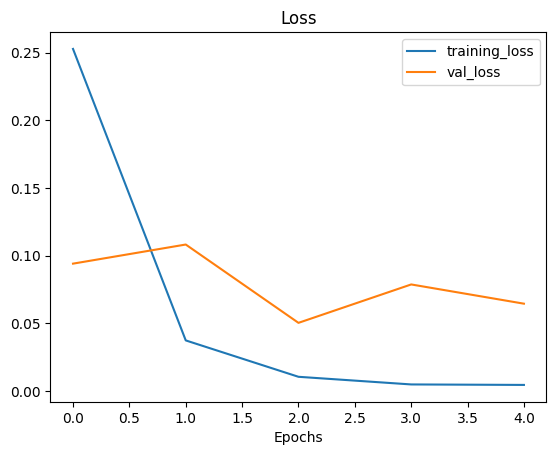

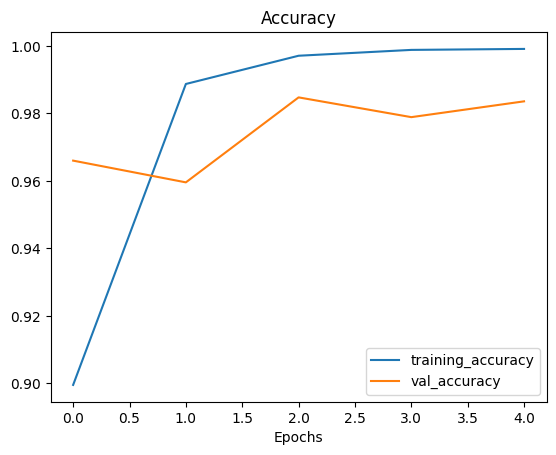

In [34]:
plot_loss_curves(model_1_history)

In the curves plotted above, we can see that the training loss and accuracy both perform better than the validation's loss and accuracy. 
Since the curves don't closely follow each other we can say that this model is overfitting.

In [36]:
# Make predictions
model_1_preds = tf.round(model_1.predict(X_test))
model_1_preds

54/54 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step


<tf.Tensor: shape=(1707, 1), dtype=float32, numpy=
array([[0.],
       [1.],
       [0.],
       ...,
       [0.],
       [1.],
       [0.]], dtype=float32)>

In [37]:
# Let's look at how well our model did
results_model_1 = model_results(y_test, model_1_preds)
model_results(y_test, model_1_preds)

{'accuracy': 0.9835969537199766,
 'precision': 0.9837389665447702,
 'recall': 0.9835969537199766,
 'f1-score': 0.9836410905335085}

### 2.3) Model 2 (Using convolutional layers)

In [39]:
# Set the seed 
tf.random.set_seed(42)

# Create new embedding 
model_2_embedding = tf.keras.layers.Embedding(input_dim = max_tokens,
                                              output_dim = 128)

# Create the model
inputs = layers.Input(shape=(1,), dtype="string")
x = vectorize_layer(inputs)
x = model_2_embedding(x)
x = layers.Conv1D(filters= 32, kernel_size=5)(x)
x = layers.GlobalAveragePooling1D()(x)
outputs = layers.Dense(1, activation='sigmoid')(x)

model_2 = tf.keras.Model(inputs, outputs, name='Model_2')

# Compile the model
model_2.compile(loss='binary_crossentropy',
                optimizer = tf.keras.optimizers.Adam(),
                metrics=['accuracy'])
          

In [40]:
model_2.summary()

Model: "Model_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 1)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ text_vectorization                   │ (None, 228)                 │               0 │
│ (TextVectorization)                  │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ embedding (Embedding)                │ (None, 228, 128)            │       2,560,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d (Conv1D)                      │ (None, 224, 32)             │          20,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling1d             │ (None, 32)                  │               0 │
│ (GlobalAveragePooling1D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,580,545 (9.84 MB)

 Trainable params: 2,580,545 (9.84 MB)

 Non-trainable params: 0 (0.00 B)

In [41]:
# Fit the model
model_2_history = model_2.fit(x = X_train,
                              y = y_train,
                              epochs = 5,
                              validation_data = (X_test, y_test))

Epoch 1/5
109/109 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - accuracy: 0.8023 - loss: 0.4241 - val_accuracy: 0.9215 - val_loss: 0.2340
Epoch 2/5
109/109 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - accuracy: 0.9371 - loss: 0.1677 - val_accuracy: 0.9338 - val_loss: 0.1537
Epoch 3/5
109/109 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - accuracy: 0.9555 - loss: 0.1127 - val_accuracy: 0.9607 - val_loss: 0.0966
Epoch 4/5
109/109 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - accuracy: 0.9642 - loss: 0.0866 - val_accuracy: 0.9760 - val_loss: 0.0857
Epoch 5/5
109/109 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - accuracy: 0.9755 - loss: 0.0724 - val_accuracy: 0.9783 - val_loss: 0.0826


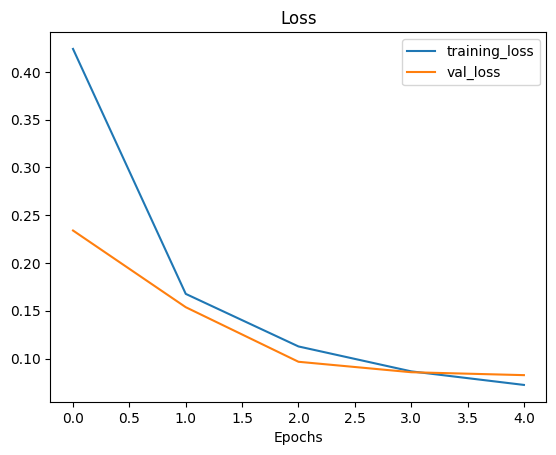

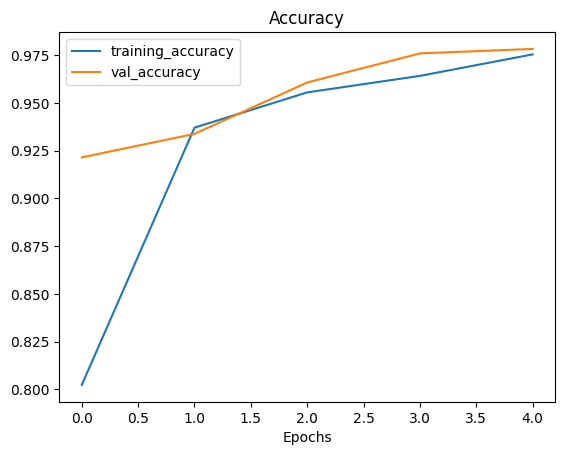

In [42]:
plot_loss_curves(model_2_history)

In both these plots, the training and validation accuracy and loss closely follow each other.
This means that our model is generalizing well unlike the model_1.

In [44]:
# Make predictions
model_2_preds = tf.round(model_2.predict(X_test))
model_2_preds

54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step


<tf.Tensor: shape=(1707, 1), dtype=float32, numpy=
array([[0.],
       [1.],
       [0.],
       ...,
       [0.],
       [1.],
       [1.]], dtype=float32)>

In [45]:
# Let's look at how well our model did
results_model_2 = model_results(y_test, model_2_preds)
model_results(y_test, model_2_preds)

{'accuracy': 0.9783245459871119,
 'precision': 0.9789843834915264,
 'recall': 0.9783245459871119,
 'f1-score': 0.97847378982826}

## 4) Compare our models

In [47]:
score_df = pd.DataFrame([results_base_model, results_model_1, results_model_2], index=['base_model', 'model_1', 'model_2'])
score_df

,accuracy,precision,recall,f1-score
base_model,0.874634,0.893009,0.874634,0.860644
model_1,0.983597,0.983739,0.983597,0.983641
model_2,0.978325,0.978984,0.978325,0.978474


In [48]:
score_df = score_df.reset_index().melt(id_vars="index")
score_df.rename(columns={"index": "model"}, inplace=True)
score_df

,model,variable,value
0,base_model,accuracy,0.874634
1,model_1,accuracy,0.983597
2,model_2,accuracy,0.978325
3,base_model,precision,0.893009
4,model_1,precision,0.983739
5,model_2,precision,0.978984
6,base_model,recall,0.874634
7,model_1,recall,0.983597
8,model_2,recall,0.978325
9,base_model,f1-score,0.860644


Text(0, 0.5, 'values')

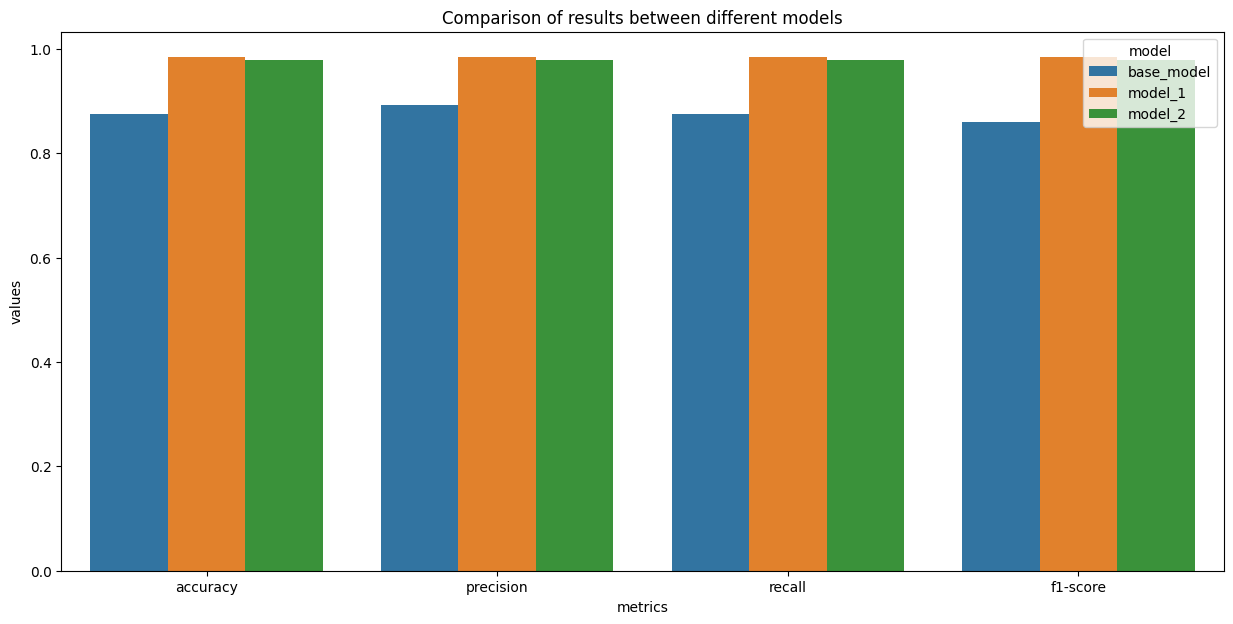

In [49]:
plt.figure(figsize=(15, 7))
sns.barplot(score_df, x='variable', y='value', hue='model')
plt.title('Comparison of results between different models')
plt.xlabel('metrics')
plt.ylabel('values')

Model_2 seems to be the best performing model, however we noticed that it may have been overfitting the training data.
Let us verify this by making predictions on a brand new data set

## 5) Testing our models on new data
source : https://www.kaggle.com/datasets/devildyno/email-spam-or-not-classification

In [52]:
# Let's test our model on a brand new dataset 
df_new = pd.read_csv(r'spam_dataset.csv')
df_new

,message_content,is_spam
0,"Hello Lonnie,\n\nJust wanted to touch base reg...",0
1,"Congratulations, you've won a prize! Call us n...",1
2,You have been pre-approved for a credit card w...,1
3,"Limited time offer, act now! Only a few spots ...",1
4,Your loan has been approved! Transfer funds to...,1
...,...,...
995,"Hello Virginia,\n\nIt was great to catch up wi...",0
996,Final notice: Claim your inheritance from a di...,1
997,Hot singles in your area want to chat! Contact...,1
998,Your loan has been approved! Transfer funds to...,1


In [53]:
# Look at the different emails with the label associated with it

random_mail = random.sample(list(range(len(df_new))), 5)

for x in random_mail:
    print(f"Label of the chosen mail : {df_new['is_spam'].iloc[x]}\n ----------------------------------------------------\n")
    print(f"{df_new['message_content'].iloc[x]} \n -------------------------------------------------- \n")

Label of the chosen mail : 0
 ----------------------------------------------------

Hey Sean,

Can you please confirm your availability for the meeting next week? We need to finalize the schedule. Effect old another amount seek news.
Professional relationship provide morning TV perhaps movement agree. Fast describe authority dark. Generation any watch even middle military during.

Cheers,
Laura Moon

I appreciate your attention to this matter. Looking forward to your response.

If you have any questions, please feel free to reach out. 
 -------------------------------------------------- 

Label of the chosen mail : 1
 ----------------------------------------------------

Congratulations, you've won a prize! Call us now to claim it.

Don’t miss out on this unique chance to win big! Click now to participate.

For more details, visit our website or contact us directly. 
 -------------------------------------------------- 

Label of the chosen mail : 1
 ------------------------------------

In [54]:
# Make a test set with 99% of the dataset
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(df_new['message_content'], df_new['is_spam'], test_size=0.99)
len(X_test_2), len(y_test_2)

(990, 990)

In [55]:
# Convert to arrays for predictions
X_test_2 = np.array(X_test_2)
y_test_2 = np.array(y_test_2)

In [56]:
# Using model_1 to predict
new_df_preds = tf.round(model_1.predict(X_test_2))

31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step


In [57]:
# Using model_2 to predict
new_df_preds_2 = tf.round(model_2.predict(X_test_2))

31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


In [58]:
# Results of model 1
model_results(y_test_2, new_df_preds)

{'accuracy': 0.9131313131313131,
 'precision': 0.917389959797959,
 'recall': 0.9131313131313131,
 'f1-score': 0.9129091653027823}

In [59]:
# Results of model 2
model_results(y_test_2, new_df_preds_2)

{'accuracy': 0.990909090909091,
 'precision': 0.9910714285714285,
 'recall': 0.990909090909091,
 'f1-score': 0.9909083395321927}

As noticed before, the model_1 overfitted and obtained 92% whereas the model_2 generalized well and even
managed to achieve the score of 99% !

## 6) Testing our best model on a larger dataset (Enron Spam Dataset)
Source : : https://github.com/MWiechmann/enron_spam_data?tab=readme-ov-file

In [95]:
df_enron = pd.read_csv(r'enron_spam_data.csv')
df_enron

,Message ID,Subject,Message,Spam/Ham,Date
0,0,christmas tree farm pictures,NaN,ham,1999-12-10
1,1,"vastar resources , inc .","gary , production from the high island larger ...",ham,1999-12-13
2,2,calpine daily gas nomination,- calpine daily gas nomination 1 . doc,ham,1999-12-14
3,3,re : issue,fyi - see note below - already done .\nstella\...,ham,1999-12-14
4,4,meter 7268 nov allocation,fyi .\n- - - - - - - - - - - - - - - - - - - -...,ham,1999-12-14
...,...,...,...,...,...
33711,33711,= ? iso - 8859 - 1 ? q ? good _ news _ c = eda...,"hello , welcome to gigapharm onlinne shop .\np...",spam,2005-07-29
33712,33712,all prescript medicines are on special . to be...,i got it earlier than expected and it was wrap...,spam,2005-07-29
33713,33713,the next generation online pharmacy .,are you ready to rock on ? let the man in you ...,spam,2005-07-30
33714,33714,bloow in 5 - 10 times the time,learn how to last 5 - 10 times longer in\nbed ...,spam,2005-07-30


In [97]:
def one_hot_encode(x):
    if x=='ham':
        x=0
    else:
        x=1
    return x

In [144]:
# One hot encode Spam/Ham
df_enron['Spam/Ham'] = df_enron['Spam/Ham'].map(lambda x : one_hot_encode(x))
df_enron

C:\Users\louis\AppData\Local\Temp\ipykernel_18948\2277736268.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_enron['Spam/Ham'] = df_enron['Spam/Ham'].map(lambda x : one_hot_encode(x))


,Message ID,Subject,Message,Spam/Ham,Date
1,1,"vastar resources , inc .","gary , production from the high island larger ...",1,1999-12-13
2,2,calpine daily gas nomination,- calpine daily gas nomination 1 . doc,1,1999-12-14
3,3,re : issue,fyi - see note below - already done .\nstella\...,1,1999-12-14
4,4,meter 7268 nov allocation,fyi .\n- - - - - - - - - - - - - - - - - - - -...,1,1999-12-14
5,5,mcmullen gas for 11 / 99,"jackie ,\nsince the inlet to 3 river plant is ...",1,1999-12-14
...,...,...,...,...,...
33711,33711,= ? iso - 8859 - 1 ? q ? good _ news _ c = eda...,"hello , welcome to gigapharm onlinne shop .\np...",1,2005-07-29
33712,33712,all prescript medicines are on special . to be...,i got it earlier than expected and it was wrap...,1,2005-07-29
33713,33713,the next generation online pharmacy .,are you ready to rock on ? let the man in you ...,1,2005-07-30
33714,33714,bloow in 5 - 10 times the time,learn how to last 5 - 10 times longer in\nbed ...,1,2005-07-30


In [146]:
# Look at distribution of Spam/Ham
df_enron.groupby('Spam/Ham')['Spam/Ham'].count()

Spam/Ham
1    33345
Name: Spam/Ham, dtype: int64

In [148]:
# Check for missing values
df_enron.isna().sum()

Message ID      0
Subject       238
Message         0
Spam/Ham        0
Date            0
dtype: int64

In [150]:
# Drop missing values (only 371 out of 33715 mails)
df_enron = df_enron.dropna(subset=["Message"])

In [152]:
# Predict labels
Test = np.array(df_enron['Message'])
pred_enron = tf.round(model_2.predict(Test))

1043/1043 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step


In [153]:
pred_enron[:10]

<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
array([[0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.]], dtype=float32)>

In [141]:
# Show results
model_results(df_enron['Spam/Ham'], pred_enron)

{'accuracy': 0.9260458839406208,
 'precision': 0.9300979917133381,
 'recall': 0.9260458839406208,
 'f1-score': 0.9258289919949502}